In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
# Lecture des départements
dept = pd.read_csv(
    data_url + "departements-region.csv",
    sep=",",
    header=0,
    names=[
        "Num_Département",
        "Département",
        "Région",
    ],
)
# Lecture des dommages aux animaux de rente
dommages = pd.read_csv(data_url + "dommages.csv", sep=";")
# Lecture des tirs létaux sur les loups
interventions = pd.read_csv(data_url + "protocole_intervention.csv", sep=";")
# Regroupement dans 1 dataframe
donnees_pna = pd.merge(dommages, interventions)

# Ajout des départements et régions
# dommages = pd.merge(dommages, dept, on="Département")
# interventions = pd.merge(interventions, dept, on="Département")
donnees_pna = pd.merge(donnees_pna, dept, on="Département")


In [16]:
# Calcul des colonnes supplémentaires
donnees_pna.fillna(0, inplace=True)
donnees_pna["AP_TOTAL"] = donnees_pna.apply(
    lambda row: row.AP_TDS + row.AP_TDR + row.AP_TP + row.AP_TPR, axis=1
)
donnees_pna["Loups_tués"] = donnees_pna.apply(
    lambda row: row.Loups_tués_légal + row.Loups_tués_illégal, axis=1
)
donnees_pna.head()


,Année,Département,Nb_dossiers,Nb_animaux_tués,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident,Num_Département,Région,AP_TOTAL,Loups_tués
0,2016,Alpes-de-Haute-Provence,477,1272,0.0,0.0,0.0,0.0,4.0,0.0,2.0,04,Provence-Alpes-Côte d'Azur,0.0,4.0
1,2017,Alpes-de-Haute-Provence,556,1610,0.0,0.0,0.0,0.0,1.0,0.0,0.0,04,Provence-Alpes-Côte d'Azur,0.0,1.0
2,2018,Alpes-de-Haute-Provence,531,1769,310.0,41.0,0.0,5.0,9.0,0.0,6.0,04,Provence-Alpes-Côte d'Azur,356.0,9.0
3,2019,Alpes-de-Haute-Provence,649,1942,432.0,57.0,3.0,0.0,12.0,2.0,1.0,04,Provence-Alpes-Côte d'Azur,492.0,14.0
4,2020,Alpes-de-Haute-Provence,534,1677,491.0,88.0,0.0,1.0,9.0,4.0,0.0,04,Provence-Alpes-Côte d'Azur,580.0,13.0


In [3]:
# dommages_y = dommages.groupby(["Année", "Région"])
# dommages_y.sum(numeric_only=True)


In [4]:
# interventions_y = interventions.groupby(["Année"])
# interventions_y.sum(numeric_only=True)

In [17]:
donnees_pna_y = donnees_pna.groupby(["Année"])
donnees_pna_y.sum(numeric_only=True)

,Nb_dossiers,Nb_animaux_tués,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident,AP_TOTAL,Loups_tués
Année,,,,,,,,,,,
2016,2465,9040,0.0,0.0,0.0,0.0,33.0,0.0,5.0,0.0,33.0
2017,2551,9586,0.0,0.0,0.0,0.0,34.0,1.0,1.0,0.0,35.0
2018,3061,10589,1469.0,161.0,5.0,15.0,47.0,4.0,27.0,1650.0,51.0
2019,3559,11793,1609.0,210.0,12.0,2.0,94.0,5.0,20.0,1833.0,99.0
2020,3517,11364,2084.0,319.0,7.0,2.0,97.0,8.0,0.0,2412.0,105.0
2021,3409,10462,2188.0,231.0,0.0,0.0,100.0,6.0,0.0,2419.0,106.0
2022,2476,7918,2409.0,320.0,1.0,0.0,159.0,6.0,0.0,2730.0,165.0


In [19]:
# Apply the default theme
sns.set_theme()

In [20]:
dept_max = (
    "Num_Département == '06' or Num_Département == '04' or Num_Département == '05' or Num_Département == '83'"
    + "or Num_Département == '26' or Num_Département == '38' or Num_Département == '73' or Num_Département == '74'"
)
donnees_pna_max = donnees_pna.query(dept_max)


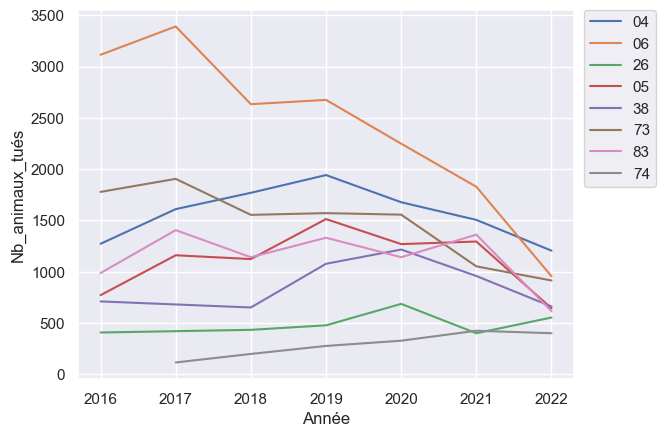

In [27]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Nb_animaux_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

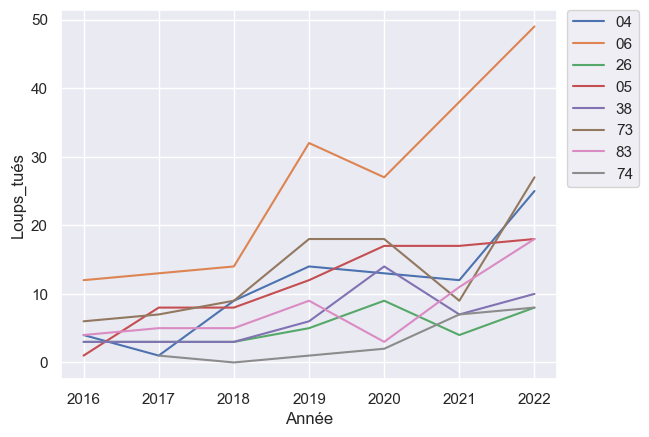

In [28]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Loups_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

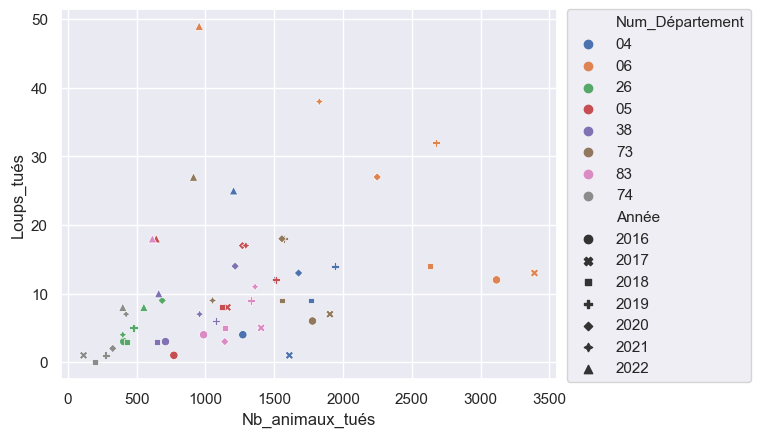

In [29]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

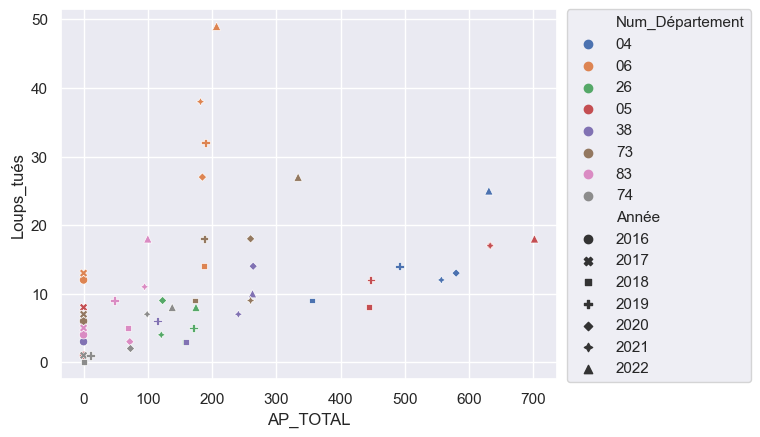

In [30]:
sns.scatterplot(
    data=donnees_pna_max,
    x="AP_TOTAL",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

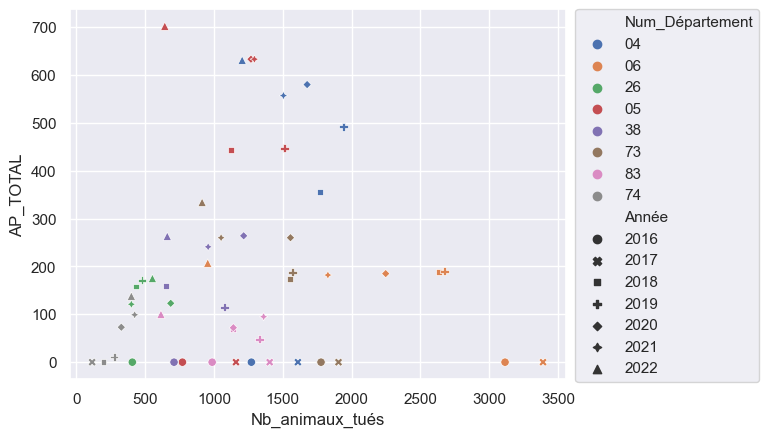

In [31]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="AP_TOTAL",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);